## Imports

In [1]:
from dataset import ChestXray14
from model import get_encoder
import tqdm
import torch
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.spatial.distance import cdist
import random
from einops import rearrange, repeat
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, mark_inset
from medcam import medcam

Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


Training on 3330 images (Cardiomegaly)


Training Loss: 0.6826149225234985: 100%|████████| 53/53 [00:11<00:00,  4.44it/s]


Epoch: 1 | Training Loss: 0.68


Validation Loss: 0.6670555472373962: 100%|██████| 26/26 [00:06<00:00,  4.10it/s]


Epoch: 1 | Validation Loss: 0.67


Training Loss: 0.6740596294403076: 100%|████████| 53/53 [00:12<00:00,  4.37it/s]


Epoch: 2 | Training Loss: 0.67


Validation Loss: 0.6960915327072144: 100%|██████| 26/26 [00:06<00:00,  4.08it/s]


Epoch: 2 | Validation Loss: 0.70


Training Loss: 0.6054409742355347: 100%|████████| 53/53 [00:11<00:00,  4.45it/s]


Epoch: 3 | Training Loss: 0.61


Validation Loss: 0.6963412165641785: 100%|██████| 26/26 [00:06<00:00,  4.08it/s]


Epoch: 3 | Validation Loss: 0.70


Training Loss: 0.5930512547492981: 100%|████████| 53/53 [00:12<00:00,  4.40it/s]


Epoch: 4 | Training Loss: 0.59


Validation Loss: 0.6599439382553101: 100%|██████| 26/26 [00:06<00:00,  4.08it/s]


Epoch: 4 | Validation Loss: 0.66


Training Loss: 0.7122731804847717: 100%|████████| 53/53 [00:11<00:00,  4.43it/s]


Epoch: 5 | Training Loss: 0.71


Validation Loss: 0.6128708720207214: 100%|██████| 26/26 [00:06<00:00,  4.02it/s]


Epoch: 5 | Validation Loss: 0.61


Training Loss: 0.3770773410797119: 100%|████████| 53/53 [00:11<00:00,  4.43it/s]


Epoch: 6 | Training Loss: 0.38


Validation Loss: 0.5695417523384094: 100%|██████| 26/26 [00:06<00:00,  4.09it/s]


Epoch: 6 | Validation Loss: 0.57


Training Loss: 0.23274129629135132: 100%|███████| 53/53 [00:11<00:00,  4.44it/s]


Epoch: 7 | Training Loss: 0.23


Validation Loss: 0.6178115606307983: 100%|██████| 26/26 [00:06<00:00,  4.08it/s]


Epoch: 7 | Validation Loss: 0.62


Training Loss: 1.0390498638153076: 100%|████████| 53/53 [00:12<00:00,  4.40it/s]


Epoch: 8 | Training Loss: 1.04


Validation Loss: 0.5973080992698669: 100%|██████| 26/26 [00:06<00:00,  4.09it/s]


Epoch: 8 | Validation Loss: 0.60


Training Loss: 0.4008170962333679: 100%|████████| 53/53 [00:12<00:00,  4.41it/s]


Epoch: 9 | Training Loss: 0.40


Validation Loss: 0.5516119599342346: 100%|██████| 26/26 [00:06<00:00,  4.04it/s]


Epoch: 9 | Validation Loss: 0.55


Training Loss: 0.25070154666900635: 100%|███████| 53/53 [00:11<00:00,  4.42it/s]


Epoch: 10 | Training Loss: 0.25


Validation Loss: 0.5135828256607056: 100%|██████| 26/26 [00:06<00:00,  4.02it/s]


Epoch: 10 | Validation Loss: 0.51


Training Loss: 0.6984561681747437: 100%|████████| 53/53 [00:12<00:00,  4.38it/s]


Epoch: 11 | Training Loss: 0.70


Validation Loss: 0.43350929021835327: 100%|█████| 26/26 [00:06<00:00,  4.01it/s]


Epoch: 11 | Validation Loss: 0.43


Training Loss: 0.36951807141304016: 100%|███████| 53/53 [00:12<00:00,  4.39it/s]


Epoch: 12 | Training Loss: 0.37


Validation Loss: 0.7104567885398865: 100%|██████| 26/26 [00:06<00:00,  3.98it/s]


Epoch: 12 | Validation Loss: 0.71


Training Loss: 1.0673854351043701: 100%|████████| 53/53 [00:11<00:00,  4.42it/s]


Epoch: 13 | Training Loss: 1.07


Validation Loss: 0.5908752679824829: 100%|██████| 26/26 [00:06<00:00,  4.05it/s]


Epoch: 13 | Validation Loss: 0.59


Training Loss: 0.7336023449897766: 100%|████████| 53/53 [00:12<00:00,  4.41it/s]


Epoch: 14 | Training Loss: 0.73


Validation Loss: 0.5360233783721924: 100%|██████| 26/26 [00:06<00:00,  4.00it/s]


Epoch: 14 | Validation Loss: 0.54


Training Loss: 0.49718207120895386: 100%|███████| 53/53 [00:12<00:00,  4.40it/s]


Epoch: 15 | Training Loss: 0.50


Validation Loss: 0.44651201367378235: 100%|█████| 26/26 [00:06<00:00,  4.05it/s]


Epoch: 15 | Validation Loss: 0.45


Training Loss: 1.1310834884643555: 100%|████████| 53/53 [00:12<00:00,  4.36it/s]


Epoch: 16 | Training Loss: 1.13


Validation Loss: 0.5685575604438782: 100%|██████| 26/26 [00:06<00:00,  4.03it/s]


Epoch: 16 | Validation Loss: 0.57


Training Loss: 0.24480417370796204: 100%|███████| 53/53 [00:11<00:00,  4.43it/s]


Epoch: 17 | Training Loss: 0.24


Validation Loss: 0.5526676177978516: 100%|██████| 26/26 [00:06<00:00,  4.08it/s]


Epoch: 17 | Validation Loss: 0.55


Training Loss: 0.3113664388656616: 100%|████████| 53/53 [00:12<00:00,  4.39it/s]


Epoch: 18 | Training Loss: 0.31


Validation Loss: 0.6049174070358276: 100%|██████| 26/26 [00:06<00:00,  4.04it/s]


Epoch: 18 | Validation Loss: 0.60


Training Loss: 0.21980831027030945: 100%|███████| 53/53 [00:11<00:00,  4.44it/s]


Epoch: 19 | Training Loss: 0.22


Validation Loss: 0.4265468418598175: 100%|██████| 26/26 [00:06<00:00,  3.97it/s]


Epoch: 19 | Validation Loss: 0.43


Training Loss: 0.14653539657592773: 100%|███████| 53/53 [00:12<00:00,  4.37it/s]


Epoch: 20 | Training Loss: 0.15


Validation Loss: 0.6207002997398376: 100%|██████| 26/26 [00:06<00:00,  3.99it/s]

Epoch: 20 | Validation Loss: 0.62


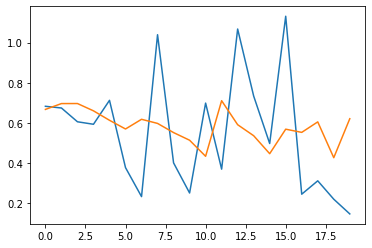

In [2]:
from main import main
main("complement")

# 

## CUDA

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Image Retrieval Tasks

In [6]:
retrieval_tasks = [
    'Cardiomegaly',
    'Opacity',
    'Emphysema',
]

## Embeddings

In [7]:
def data(encoder_choice, class_name):
    model_weights_path = 'weights/{}_{}_{}_weights'.format(encoder_choice, class_name, "orig")
    model = get_encoder(encoder_choice=encoder_choice)
    model = model.to(device)
    model.load_state_dict(torch.load(model_weights_path))
    model.eval()
    images = []
    embeddings = []
    labels = []
    test_dataset = ChestXray14(phase='test', class_name=class_name)
    test_data_loader = DataLoader(test_dataset, shuffle=False)
    progress_bar = tqdm.tqdm(test_data_loader)
    progress_bar.set_description(class_name)
    for data in progress_bar:
        image, label = data
        image, label = image.to(device), label.to(device)        
        embedding = model(image)
        image = image.cpu().detach().numpy()[0]
        embedding = embedding.cpu().detach().numpy()[0]
        label = label.cpu().detach().numpy()[0]
        images.append(image)
        embeddings.append(embedding)
        labels.append(label)

    images = np.array(images)
    embeddings = np.array(embeddings)
    labels = np.array(labels)
    return images, embeddings, labels

images = {}
embeddings = {}
labels = {}

for task in retrieval_tasks:
    encoder_choice = 'vit'
    class_name = task
    images[task], embeddings[task], labels[task] = data(encoder_choice, class_name)

Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main
Cardiomegaly: 100%|███████████████████████████| 556/556 [00:11<00:00, 47.98it/s]
Using cache found in /home/developer/.cache/torch/hub/facebookresearch_deit_main


FileNotFoundError: [Errno 2] No such file or directory: 'weights/vit_Opacity_orig_weights'

## Qualitative Analysis

KeyError: 'Opacity'

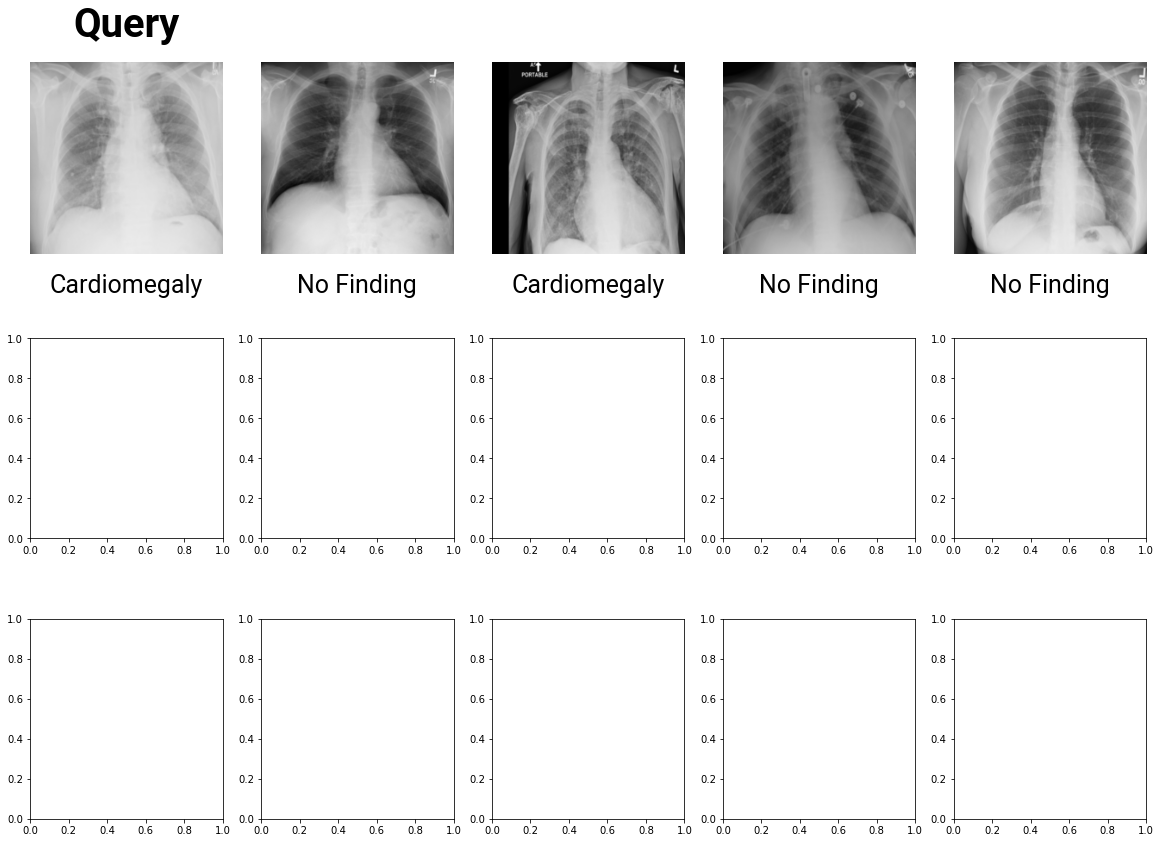

In [9]:
fig, ax = plt.subplots(3, 5, figsize=(20, 14))

path = 'fonts/Roboto-Bold.ttf'
fontprop = fm.FontProperties(fname=path, size=40)
title1 = ax[0][0].set_title('Query', fontproperties=fontprop, pad=25)

plt.subplots_adjust(hspace=0.4)

retrieval_indices = [481, 2722, 133]

for task_index, task in enumerate(retrieval_tasks):
    i = retrieval_indices[task_index]
    nearest_neighbor_indices = cdist(embeddings[task], embeddings[task])[i].argsort()
    nearest_neighbor_indices = nearest_neighbor_indices[nearest_neighbor_indices != i]
    indices = [i]
    indices.extend(nearest_neighbor_indices[:4])

    for image_index, sub_ax in enumerate(ax[task_index]):
        sub_ax.get_xaxis().set_ticks([])
        sub_ax.get_yaxis().set_ticks([])
        for spine in sub_ax.spines:
            sub_ax.spines[spine].set_visible(False)
        path = 'fonts/Roboto-Regular.ttf'
        fontprop = fm.FontProperties(fname=path, size=25)
        image = rearrange(images[task][indices[image_index]], 'c w h -> w h c')
        sub_ax.imshow(image, cmap='Greys_r')
        label = labels[task][indices[image_index]]
        if label:
            label = task
        else:
            label = 'No Finding'
        sub_ax.text(0.5, -0.1, label, ha='center', va='top',
               transform=sub_ax.transAxes, fontproperties=fontprop)

plt.savefig('figures/query.png', bbox_inches='tight')

## **Metrics**

In [10]:
embeddings = embeddings['Cardiomegaly']
labels = labels['Cardiomegaly']
images = images['Cardiomegaly']

In [14]:
def precision_at(k, i):
    nearest_neighbor_indices = cdist(embeddings, embeddings)[i].argsort()
    nearest_neighbor_indices = nearest_neighbor_indices[nearest_neighbor_indices != i]
    indices = []
    indices.extend(nearest_neighbor_indices[:k])
    return sum(labels[indices] == labels[i]) / k

for j in range(1, 10):
    p_at_5 = 0

    for i in range(len(embeddings)):
        p_at_5 += precision_at(k=j, i=i)

    print('ViT: ', p_at_5 / len(embeddings))

ViT:  0.6384892086330936
ViT:  0.6214028776978417
ViT:  0.626498800959233
ViT:  0.6214028776978417
ViT:  0.6219424460431672
ViT:  0.6187050359712226
ViT:  0.6217882836587865
ViT:  0.6184802158273381
ViT:  0.6153077537969631


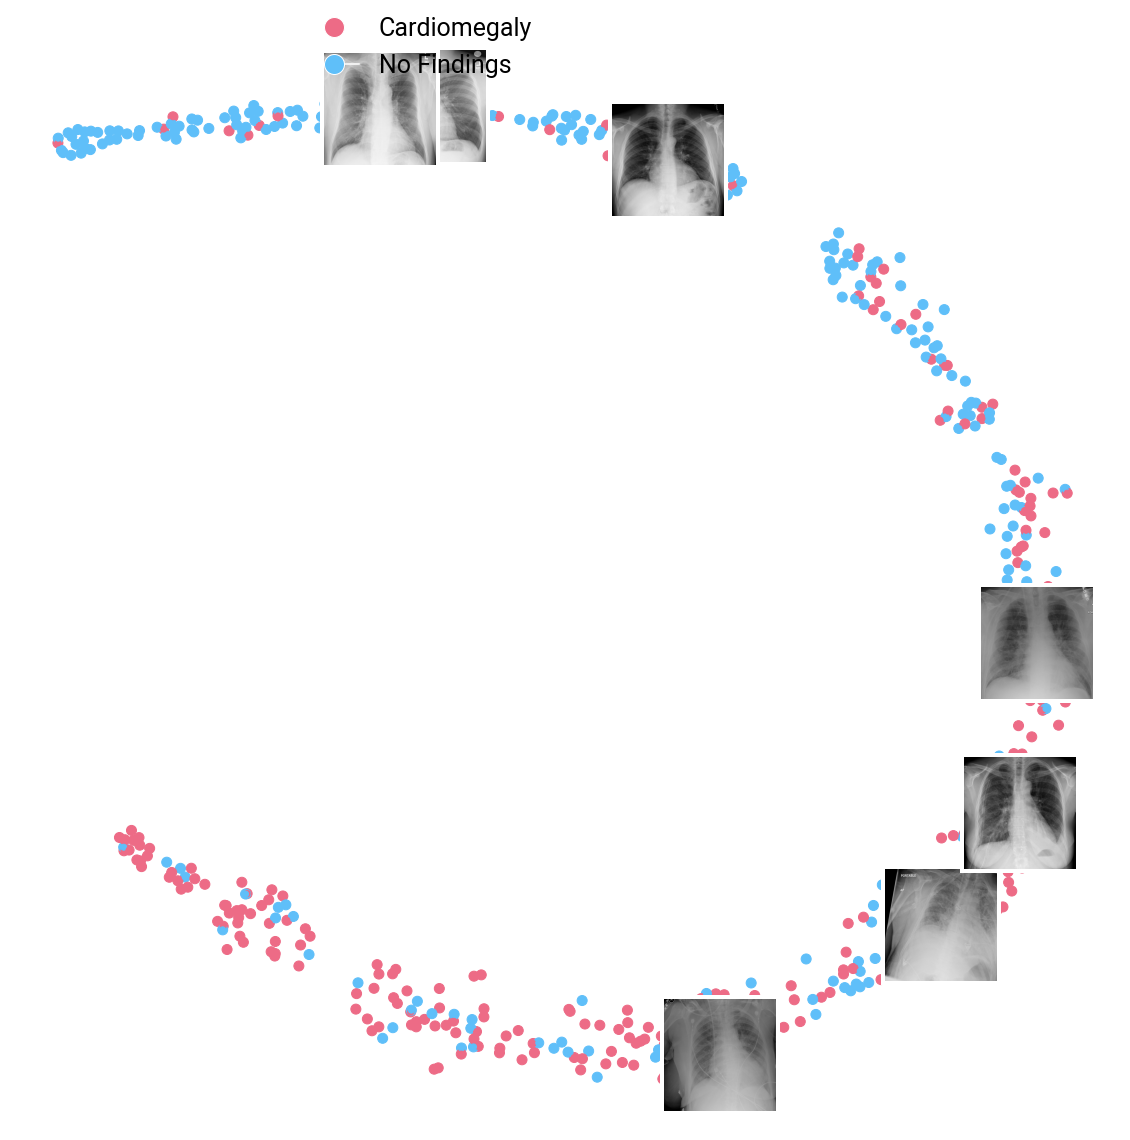

In [12]:
from sklearn.manifold import TSNE

z = TSNE().fit_transform(embeddings)

x, y = z[:, 0], z[:, 1]
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

positive_color = '#ED6B86'
negative_color = '#5FBFF9'

colors = [positive_color if labels[i] else negative_color for i in range(len(embeddings))]

fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(x, y, color=colors, s=100)

for i in [180, 179, 177, 176, 347, 342, 340, 339]:  
    img = rearrange(images[i], 'c w h -> w h c')
    imgbox = OffsetImage(img, zoom=0.5, cmap='Greys_r')
    ab = AnnotationBbox(imgbox, (x[i], y[i]),
                    xycoords='data', boxcoords='offset points', bboxprops=dict(linewidth=0))
    ax.add_artist(ab)    

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)


plt.scatter(x, y, color=colors)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D


path = 'fonts/Roboto-Regular.ttf'
fontprop = fm.FontProperties(fname=path, size=25)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Cardiomegaly', markerfacecolor=positive_color, markersize=20),
    Line2D([0], [0], marker='o', color='w', label='No Findings',markerfacecolor=negative_color, markersize=20)
]

lgnd = ax.legend(handles=legend_elements, bbox_to_anchor=(0.25, 0.95), frameon=False, prop=fontprop)
plt.savefig('figures/tsne.png', bbox_inches='tight')

In [ ]:
# df = pd.DataFrame((list(zip(x,y))), columns=['x', 'y'])
# x2, x1, y1, y2 = 0.45, 0.55, 0.5, 0.6
# df = df[(df['x'] > x2) & (df['x'] < x1) & (df['y'] < y1) & (df['y'] > y2)]


# inset_ax = fig.add_axes([0, 0, 1, 1], zorder=4, frameon=True)
# inset_ax.set_axes_locator(InsetPosition(ax, [1.2, 0.6, 0.55, 0.55]))

# inset_ax.get_xaxis().set_visible(False)
# inset_ax.get_yaxis().set_visible(False)
# for spine in ax.spines:
#     inset_ax.spines[spine].set_color('#FF70A6')
#     inset_ax.spines[spine].set_linewidth(5)

# for i in range(len(embeddings)):    
#     img = rearrange(images[i], 'c w h -> w h c')
#     imgbox = OffsetImage(img, zoom=0.35, cmap='Greys_r')
#     ab = AnnotationBbox(imgbox, (x[i], y[i]),
#                     xycoords='data', boxcoords='offset points', bboxprops=dict(linewidth=0))
#     inset_ax.add_artist(ab)

# inset_ax.set_xlim(x1, x2)
# inset_ax.set_ylim(y1, y2)

# inset = mark_inset(ax, inset_ax, loc1=3, loc2=2, fc='none', ec='#FF70A6', lw=4)
# inset[0].set_zorder(1000)

In [ ]:
model.blocks[-2]

## Saliency Maps

In [ ]:
from pytorch_grad_cam import GradCAM, \
    ScoreCAM, \
    GradCAMPlusPlus, \
    AblationCAM, \
    XGradCAM, \
    EigenCAM, \
    EigenGradCAM, \
    LayerCAM, \
    FullGrad
from pytorch_grad_cam.utils.image import show_cam_on_image

encoder_choice = 'vit'
class_name = 'Cardiomegaly'

model_weights_path = 'weights/{}_{}_weights'.format(encoder_choice, class_name)
model = get_encoder(encoder_choice=encoder_choice)
model = model.to(device)
model.load_state_dict(torch.load(model_weights_path))
model.eval()

target_layers = [model.blocks[-1].norm1]


def reshape_transform(tensor, height=14, width=14):
    result = tensor[:, 1:, :].reshape(tensor.size(0),
                                      height, width, tensor.size(2))

    # Bring the channels to the first dimension,
    # like in CNNs.
    result = result.transpose(2, 3).transpose(1, 2)
    return result

cam = EigenCAM(model=model, target_layers=target_layers,
                                   use_cuda=True,
                                   reshape_transform=reshape_transform,
                                 )
# If None, returns the map for the highest scoring category.
# Otherwise, targets the requested category.
targets = None

image = np.array([images[20]])
image = torch.from_numpy(image)
grayscale_cam = cam(input_tensor=image,
                    targets=targets ,
                    eigen_smooth=True,
                    aug_smooth=False)

grayscale_cam = grayscale_cam[0, :]

xray = rearrange(images[20], 'c w h -> w h c')

cam_image = show_cam_on_image(xray, grayscale_cam, use_rgb=False)

fig, ax = plt.subplots(1, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.05)

ax[1].imshow(cam_image)

for spine in ax[1].spines:
    ax[1].spines[spine].set_visible(False)
    
ax[1].get_xaxis().set_ticks([])
ax[1].get_yaxis().set_ticks([])


ax[0].imshow(xray)

for spine in ax[0].spines:
    ax[0].spines[spine].set_visible(False)
    
xticks = ax[0].get_xaxis().set_ticks([])
yticks = ax[0].get_yaxis().set_ticks([])

path = 'fonts/Roboto-Regular.ttf'
fontprop = fm.FontProperties(fname=path, size=25)

label = ax[0].text(1.0, -0.05, 'Cardiomegaly Saliency Map', ha='center', va='top',
               transform=ax[0].transAxes, fontproperties=fontprop)


plt.savefig('figures/saliency.png', bbox_inches='tight')